In [78]:
import numpy as np
import pandas as pd
import sklearn.linear_model

In [79]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [80]:
def get_numpy_data(data_pd, features, output):
    data_pd['constant'] = 1
    features = ['constant'] + features
    features_matrix = np.array(data_pd[features])
    output_array = np.array(data_pd[output])

    return(features_matrix, output_array)

In [81]:
def predict_output(feature_matrix, weights):
    predictions = feature_matrix.dot(weights)
    return(predictions)

In [82]:
train_data = pd.read_csv("kc_house_train_data.csv", dtype = dtype_dict)
test_data = pd.read_csv('kc_house_test_data.csv', dtype = dtype_dict)

### Derivative of Ridge

In [96]:
def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):
    if feature_is_constant:
        derivative = 2 * np.dot(errors, feature)
    else:
        derivative = 2 * np.dot(errors, feature) + 2 * l2_penalty * weight
    return derivative

### Check Ridge derivative implementations

In [97]:
sales = train_data

(example_features, example_output) = get_numpy_data(sales, ['sqft_living'], 'price')
my_weights = np.array([1., 10.])
test_predictions = predict_output(example_features, my_weights)
errors = test_predictions - example_output # prediction errors

# next two lines should print the same values
print feature_derivative_ridge(errors, example_features[:,1], my_weights[1], 1, False)
print np.sum(errors*example_features[:,1])*2+20.
print ''

# next two lines should print the same values
print feature_derivative_ridge(errors, example_features[:,0], my_weights[0], 1, True)
print np.sum(errors)*2.

-4.55328923355e+13
-4.55328923355e+13

-18029479492.0
-18029479492.0


### Gradient Descent for Ridge Regression

In [98]:
def calculate_cost(errors, weights, l2_penalty):
    summ = np.dot(errors, errors) + l2_penalty * np.dot(weights, weights)
    
    return summ

In [103]:
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations=100):
    weights = np.array(initial_weights) # make sure it's a numpy array
    iteration = 0
    while iteration < max_iterations:
        predictions = predict_output(feature_matrix, weights)
        errors = np.subtract(predictions, output) 
        for i in xrange(len(weights)):
            isConstant = False
            if i == 0:
                isConstant = True
                
            derivative = feature_derivative_ridge(errors, feature_matrix[:,i], weights[i], l2_penalty, isConstant) 
            weights[i] =  weights[i] - step_size * derivative
        iteration += 1
        #print calculate_cost(errors, weights, l2_penalty)
    return weights

## Convert test/train set

In [104]:
simple_features = ['sqft_living']
my_output = 'price'
simple_feature_matrix, output = get_numpy_data(train_data, simple_features, my_output)
simple_test_feature_matrix, test_output = get_numpy_data(test_data, simple_features, my_output)

### Experiment 1

In [108]:
step_size = 1e-12
max_iterations = 1000
initial_weights = np.zeros(len(simple_feature_matrix[0]))
l2_penalty = 0.0
simple_weights_0_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations)

print simple_weights_0_penalty

[ -1.63113515e-01   2.63024369e+02]


### Experiment 2

In [109]:
l2_penalty = 1e11
simple_weights_high_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations)

print simple_weights_high_penalty

[   9.76730382  124.57217567]


### Plot Experiments 1 & 2

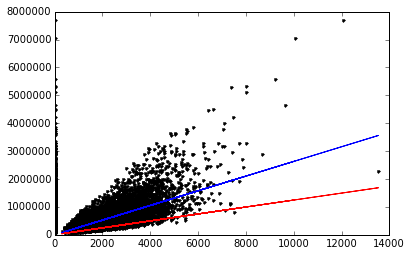

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(simple_feature_matrix,output,'k.',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_0_penalty),'b-',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_high_penalty),'r-')

## Quiz Question: What is the value of the coefficient for sqft_living that you learned with no regularization, rounded to 1 decimal place? What about the one with high regularization?

In [112]:
print round(simple_weights_0_penalty[1],1)

263.0


In [136]:
print round(simple_weights_high_penalty[1],1)

124.6


## Quiz Question: Comparing the lines you fit with the with no regularization versus high regularization, which one is steeper?

In [114]:
print round(simple_weights_0_penalty[1],1)
print round(simple_weights_high_penalty[1],1)

263.0
124.6


##  Compute the RSS on the TEST data

In [115]:
preds_0_penalty = predict_output(simple_test_feature_matrix, simple_weights_0_penalty)
preds_high_penalty = predict_output(simple_test_feature_matrix, simple_weights_high_penalty)

In [116]:
errors_0_penalty = np.subtract(preds_0_penalty, test_output)
errors_high_penalty = np.subtract(preds_high_penalty, test_output)

In [117]:
rss_0_penalty = np.dot(errors_0_penalty, errors_0_penalty)
rss_high_penalrt = np.dot(errors_high_penalty, errors_high_penalty)

## Quiz Question: What are the RSS on the test data for each of the set of weights above (initial, no regularization, high regularization)?

In [119]:
print rss_0_penalty

2.75723632154e+14


In [120]:
print rss_high_penalrt

6.9464210149e+14


In [121]:
model_features = ['sqft_living', 'sqft_living15']
my_output = 'price'
(feature_matrix, output) = get_numpy_data(train_data, model_features, my_output)
(test_feature_matrix, test_output) = get_numpy_data(test_data, model_features, my_output)

### Experiment 3

In [124]:
initial_weights = np.zeros(len(feature_matrix[0]))
step_size = 1e-12
max_iterations = 1000
l2_penalty = 0.0

multiple_weights_0_penalty = ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations)
print multiple_weights_0_penalty


[  -0.35743483  243.05416982   22.41481497]


### Expriment 4

In [126]:
l2_penalty = 1e11

multiple_weights_high_penalty = ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations)
print multiple_weights_high_penalty

[  6.74296579  91.48927365  78.43658766]


## Quiz Question: What is the value of the coefficient for ‘sqft_living’ that you learned with no regularization, rounded to 1 decimal place? What about the one with high regularization?

In [129]:
print round(multiple_weights_0_penalty[1], 1)

243.1


In [130]:
print round(multiple_weights_high_penalty[1], 1)

91.5


## Quiz Question: What are the RSS on the test data for each of the set of weights above (initial, no regularization, high regularization)?

In [131]:
preds_0_penalty = predict_output(test_feature_matrix, multiple_weights_0_penalty)
preds_high_penalty = predict_output(test_feature_matrix, multiple_weights_high_penalty)
errors_0_penalty = np.subtract(preds_0_penalty, test_output)
errors_high_penalty = np.subtract(preds_high_penalty, test_output)
rss_0_penalty = np.dot(errors_0_penalty, errors_0_penalty)
rss_high_penalrt = np.dot(errors_high_penalty, errors_high_penalty)

In [132]:
print rss_0_penalty

2.74067615919e+14


In [133]:
print rss_high_penalrt

5.00404800501e+14


## What's the error in predicting the price of the first house in the test set using the weights learned with no regularization? What about with high regularization?

In [134]:
print preds_0_penalty[0]

387465.476058


In [135]:
print preds_high_penalty[0]

270453.530322


In [137]:
print test_output[0]

310000.0
